Now that you've spent some time playing with a sample multivariate linear regression model, it's time to make your own.

You've already gotten started by prepping the FBI:UCR Crime dataset (Thinkful mirror) in a previous assignment.

Using this data, build a regression model to predict property crimes. You can use the features you prepared in the previous assignment, new features of your own choosing, or a combination. The goal here is prediction rather than understanding mechanisms, so the focus is on creating a model that explains a lot of variance.

Submit a notebook with your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
import xlrd
df=pd.read_excel('Lesson4-2.xlsx',
                 sheet_name='13tbl8ny')

In [3]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery-Count,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan


In [4]:
df=df[['City','Population','Robbery-Count','Murder and nonnegligent manslaughter','Property crime']]

In [5]:
df.head()

,City,Population,Robbery-Count,Murder and nonnegligent manslaughter,Property crime
0,Adams Village,1861,0,0,12
1,Addison Town and Village,2577,0,0,24
2,Akron Village,2846,0,0,16
3,Albany,97956,227,8,4090
4,Albion Village,6388,4,0,223


In [6]:
df['Population_Squared']=None
df['Murder']=1
df['Robbery']=1

In [7]:
df.head()

,City,Population,Robbery-Count,Murder and nonnegligent manslaughter,Property crime,Population_Squared,Murder,Robbery
0,Adams Village,1861,0,0,12,None,1,1
1,Addison Town and Village,2577,0,0,24,None,1,1
2,Akron Village,2846,0,0,16,None,1,1
3,Albany,97956,227,8,4090,None,1,1
4,Albion Village,6388,4,0,223,None,1,1


In [8]:
df['Population_Squared']=df['Population']*df['Population']
df.loc[df['Murder and nonnegligent manslaughter']==0,'Murder']=0
df.loc[df['Robbery-Count']==0,'Robbery']=0

In [9]:
df.head()

,City,Population,Robbery-Count,Murder and nonnegligent manslaughter,Property crime,Population_Squared,Murder,Robbery
0,Adams Village,1861,0,0,12,3463321,0,0
1,Addison Town and Village,2577,0,0,24,6640929,0,0
2,Akron Village,2846,0,0,16,8099716,0,0
3,Albany,97956,227,8,4090,9595377936,1,1
4,Albion Village,6388,4,0,223,40806544,0,1


In [10]:
df.isnull().sum()

City                                    0
Population                              0
Robbery-Count                           0
Murder and nonnegligent manslaughter    0
Property crime                          0
Population_Squared                      0
Murder                                  0
Robbery                                 0
dtype: int64

In [11]:
regr=linear_model.LinearRegression()
Y=df['Property crime'].values.reshape(-1,1)
X=df[['Population','Population_Squared','Murder','Robbery']]
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print('\nCoefficients: \n',regr.coef_)
print('\nIntercept: \n',regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))


Coefficients: 
 [[ 3.46570268e-02 -2.11108019e-09  1.51866535e+01 -9.62774363e+01]]

Intercept: 
 [-109.57533562]

R-squared:
0.9961247104988709


### Assumption Check: Multivariate Normality

In [13]:
predicted=regr.predict(X).ravel()
actual=df['Property crime']

In [14]:
residual=actual-predicted

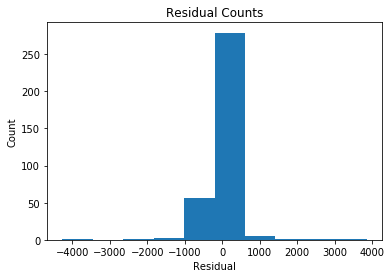

In [15]:
plt.hist(residual)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

### Assumption Check: Homoscedasticity

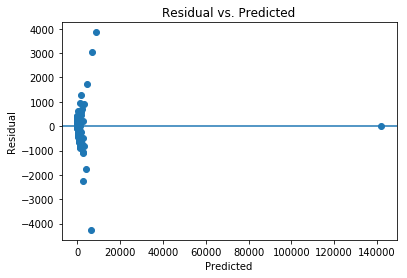

In [16]:
plt.scatter(predicted,residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

### Assumption Check: Low Multicollinarity

In [17]:
correlation_matrix=X.corr()
display(correlation_matrix)

,Population,Population_Squared,Murder,Robbery
Population,1.000,0.998,0.162,0.064
Population_Squared,0.998,1.000,0.133,0.044
Murder,0.162,0.133,1.000,0.313
Robbery,0.064,0.044,0.313,1.000
